### Utilize a base de dados para as questões abaixo archive.ics.uci.edu/ml/datasets/iris.

In [140]:
import pandas as pd

data_iris = pd.read_csv("iris.csv")
x_iris    = data_iris.drop(['variety'], axis=1)
y_iris    = data_iris['variety']

In [141]:
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [142]:
y_iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: variety, dtype: object

### 1. Descartando a variável classse, forme três grupos utilizando Mistura de Gaussianas e mostre:

In [143]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3).fit(x_iris)
gm.bic(x_iris)

582.484241068401

In [144]:
predict = gm.predict(x_iris)
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [145]:
group = {'G1':[], 'G2':[], 'G3':[]}

for i in range(len(predict)):
    index = 'G'+str((predict[i]+1))
    group[index].append(x_iris.iloc[i])

In [146]:

g1 = pd.DataFrame(group['G1'])
g1.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [147]:
g2 = pd.DataFrame(group['G2'])
g2.head()

,sepal_length,sepal_width,petal_length,petal_width
68,6.2,2.2,4.5,1.5
70,5.9,3.2,4.8,1.8
72,6.3,2.5,4.9,1.5
77,6.7,3.0,5.0,1.7
83,6.0,2.7,5.1,1.6


In [148]:
g3 = pd.DataFrame(group['G3'])
g3.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### (a) (5 pontos) O vetor de médias de cada grupo.

In [149]:
mean_g1 = []
for i in g1:
    mean_g1.append(g1[i].mean())

mean_g1

[5.904444444444445, 2.775555555555556, 4.193333333333333, 1.2933333333333332]

In [150]:
mean_g2 = []
for i in g2:
    mean_g2.append(g2[i].mean())

mean_g2

[6.554545454545455, 2.9509090909090916, 5.4890909090909075, 1.989090909090909]

In [151]:
mean_g3 = []
for i in g3:
    mean_g3.append(g3[i].mean())

mean_g3

[5.006, 3.418, 1.464, 0.244]

#### (b) (10 pontos) A matriz de covariância de cada grupo.

In [152]:
g1.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.597937,0.777249,0.560435
sepal_width,0.597937,1.000000,0.672034,0.795371
petal_length,0.777249,0.672034,1.000000,0.748343
petal_width,0.560435,0.795371,0.748343,1.000000


In [153]:
g2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.446503,0.846106,0.315974
sepal_width,0.446503,1.000000,0.438968,0.575757
petal_length,0.846106,0.438968,1.000000,0.418948
petal_width,0.315974,0.575757,0.418948,1.000000


In [154]:
g3.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


#### (c) (15 pontos) Um único gráco com os três grupos juntos, destacando cada grupo.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

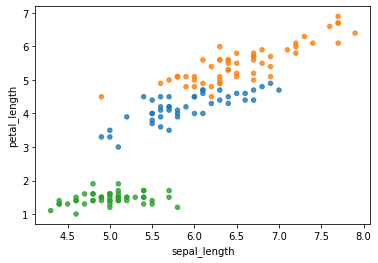

In [155]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors  = [f'C{c}' for c in predict]
x_iris.plot.scatter('sepal_length','petal_length', c=colors, alpha=0.8, ax=ax)

#### (d) (10 pontos) Para cada classe faça grácos similares ao anterior, destacando cada grupo em cada um dos grácos.

In [156]:
setosa = data_iris.loc[data_iris['variety'] == 'Iris-setosa']
versicolor = data_iris.loc[data_iris['variety'] == 'Iris-versicolor']
virginica = data_iris.loc[data_iris['variety'] == 'Iris-virginica']

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

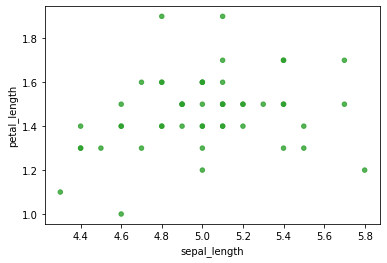

In [157]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors  = [f'C{c}' for c in predict]
setosa.plot.scatter('sepal_length','petal_length', c=colors[:50], alpha=0.8, ax=ax)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

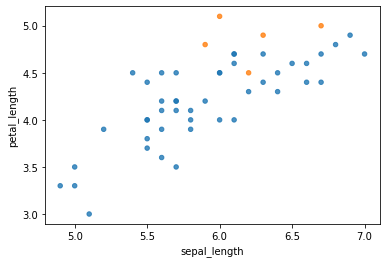

In [158]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors  = [f'C{c}' for c in predict]
versicolor.plot.scatter('sepal_length','petal_length', c=colors[50:100], alpha=0.8, ax=ax)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

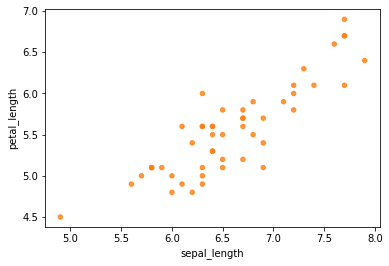

In [159]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors  = [f'C{c}' for c in predict]
virginica.plot.scatter('sepal_length','petal_length', c=colors[100:], alpha=0.8, ax=ax)

#### 2. (20 pontos) Calcule o valor do BIC de 1 a 30 grupos. Gere um gráco de linha em que o eixo-x seja a quantidade de de grupos e o eixo-y seja o valor do BIC.

In [160]:
result = []

for i in range(1, 31):
    gm = GaussianMixture(n_components=i).fit(x_iris)
    result.append({'bic':gm.bic(x_iris),'n_components':i})

<AxesSubplot:xlabel='n_components'>

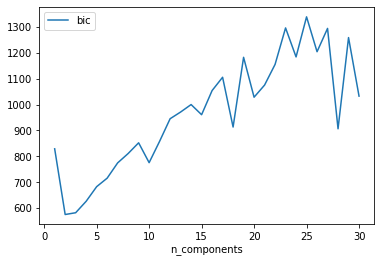

In [164]:
result = pd.DataFrame(result)
result.plot.line('n_components', 'bic')

### 3. (40 pontos) Implemente o Classicador Bayesiano assumindo que cada classe segue uma distribuição normal multivariada. Utilize os vetores de médias e as matrizes de covariâncias gerado pelo agrupamento baseado em modelos. Assuma que cada grupo gerado representa uma classe, a classe mais frequente no grupo. Substitua, na equação da distribuição normal nultivariada, o vetor de médias e a matriz de covariância para estimar a posteriori de cada classe. Finalmente aplique os cálculos a função discriminante. Calcule a taxa de acerto do classicador utilizando metade dos exemplos de cada classe como conjunto de treino e o restantante como conjunto de teste.